In [0]:
# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot
def show_plot(download_file = False):
    pyplot.legend()
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

def make_plot(plot_data_list, use_this = None):
    # it's too samll. make bigger.
    if use_this is None:
        pyplot.figure(figsize=(8, 8))
    else:
        # use_this.set_figheight(8)
        # use_this.set_figwidth(8)
        pass

    for data_dic, plot_type, color, label in plot_data_list:
        if plot_type is "plot":
            if use_this is None:
                pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color, label=label)
            else:
                use_this.plot(list(data_dic.keys()), list(data_dic.values()), c=color, label=label)    
        if plot_type is "scatter":
            if use_this is None:
                pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color, label=label)
            else:
                use_this.scatter(list(data_dic.keys()), list(data_dic.values()), c=color, label=label)

In [0]:
# 이전 과제에서 쌓여가는 함수

import numpy

def sigmoid(value):
    # print("value -> numpy.exp(-value)", value, numpy.exp(-value))
    return 1 / (1 + numpy.exp(-value))

def get_by_sigmoid(t_list, factor_list):
    # print("get_by_linear(t_list, factor_list)", get_by_linear(t_list, factor_list))
    return sigmoid(get_by_linear(t_list, factor_list))

def get_by_linear(t_list, factor_list):
    return t_list[0] + numpy.dot(t_list[1:], factor_list)

def calc_energy_value(lambda_size, theta_list, data_dic):
    ret = 0

    m = len(data_dic)

    for factor_list, r_in_d in data_dic.items():
        # (−l(i)log(sigmoid)−(1−l(i))log(1−σ(z(i))))
        z_i = get_by_sigmoid(theta_list, factor_list)


        # print(z_i, r_in_d)

        float_min = 0.00000000000000001
        calc_result = -r_in_d * numpy.log(max(z_i, float_min)) - (1 - r_in_d) * numpy.log(max(z_i, float_min))

        ret = ret + calc_result

    lambda_sum = numpy.sum(numpy.square(theta_list)) * lambda_size / 2

    return ret / m + lambda_sum
    
# Gradient Descent를 위해 cost function을 변형한 식
def calc_cost_sum_for_gradient_descent(theta_list, data_dic, multiply_bitmap):
    ret = 0

    m = len(data_dic)

    for factor_list, result_in_data in data_dic.items():
        calc_y = get_by_sigmoid(theta_list, factor_list)
        calc_result = calc_y - result_in_data

        for factor, multiply_flag in zip(factor_list, multiply_bitmap):
            if multiply_flag == 0:
                continue

            calc_result = calc_result * factor

        ret = ret + calc_result

    return ret / m
    
def next_gradient_descent_step(step_size, lambda_size, theta_list, data_dic):
    next_theta_list = []
    for i in range(len(theta_list)):
        bitmap = [0] * (len(theta_list) - 1)
        if i - 1 >= 0:
            bitmap[i-1] = 1

        # print(bitmap)

        next_theta = theta_list[i] - step_size * (calc_cost_sum_for_gradient_descent(theta_list, data_dic, bitmap) + lambda_size * theta_list[i])
        next_theta_list.append(next_theta)

    return next_theta_list
    
def check_convergence(theta_list, new_theta_list):
    # float 형의 자료형 동일한지 판단을 위해 numpy의 isclose를 사용.
    # atol = 0.000000000000000000000001
    return numpy.isclose(theta_list, new_theta_list)
    # return numpy.isclose(theta_list, new_theta_list)

In [0]:
def calc_accuracy(theta_list, factor_to_result):        
    count = 0
    for factor_list, h in factor_to_result.items():
        expected_h = get_by_linear(theta_list, factor_list)
        if expected_h > 0 and h == 1:
            count = count + 1
        if expected_h <= 0 and h == 0:
            count = count + 1

    return count / len(factor_to_result)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

x_label0 = pointX[label == 0]
y_label0 = pointY[label == 0]

x_label1 = pointX[label == 1]
y_label1 = pointY[label == 1]


In [66]:
dic0 = dict(zip(zip(x_label0, y_label0), [0] * len(x_label0)))
dic1 = dict(zip(zip(x_label1, y_label1), [1] * len(x_label1)))
factor_to_result = {**dic0, **dic1}

poly_list = []
current_theta_list = []
# 다항식을 만들기 위한 값을 리스트로 저장
# 0, 0 은 생성 안한다. (get_by_linear에서 0,0은 별도 처리를 해주고 있다.)
# (n, m) 은 x^n, y^m을 의미.

for x in range(0, 10):
    for y in range(0,10):
        if x == 0 and y == 0:
            continue
        poly_list.append((x,y))
        # poly_list.append((0,0))

# 대충 정해준거
for x in range(0, 10):
    for y in range(0,10):
        current_theta_list.append(((5.9 - x) * (5.3 -y)) ** 2)
        # current_theta_list.append(0)

print(f"size of k is {len(current_theta_list)}")
print(f"size of poly list is {len(poly_list)}")
print(poly_list)

# 이전 과제까지는 수가 작아서 이터레이션에서 계산했는데, 이번에는 값이 많아서 미리 계산해둔다.
# data_dic에는 x, y, h 이렇게 들어갔는데, poly_list를 이용해서 새로 dict을 만들어준다.
# poly_list의 값은 x^n, y^m 이렇게 됨.
factor_to_result_orig = factor_to_result
factor_to_result = {}

for (x,y), value in factor_to_result_orig.items():
    new_factor = []
    for (x_up, y_up) in poly_list:
        new_factor.append((x ** x_up) * (y ** y_up))
    
    factor_to_result[tuple(new_factor)] = value


step_size = 0.1
over_lambda_size = 0.5332
lambda_size = 1.3969
under_lambda_size = 1.7

step_count = 0

step_count_to_energy_value = {step_count: calc_energy_value(lambda_size, current_theta_list, factor_to_result)}
step_count_to_energy_value_over = {step_count: calc_energy_value(over_lambda_size, current_theta_list, factor_to_result)}
step_count_to_energy_value_under = {step_count: calc_energy_value(under_lambda_size, current_theta_list, factor_to_result)}

step_count_to_accuracy = {step_count: calc_accuracy(current_theta_list, factor_to_result)}
step_count_to_accuracy_over = {step_count: calc_accuracy(current_theta_list, factor_to_result)}
step_count_to_accuracy_under = {step_count: calc_accuracy(current_theta_list, factor_to_result)}

step_count_to_theta_list = {step_count: current_theta_list}
step_count_to_theta_list_over = {step_count: current_theta_list}
step_count_to_theta_list_under = {step_count: current_theta_list}


print("start ->",current_theta_list, "loss", step_count_to_energy_value[step_count])

no_loop = 0
current_theta_list_over = current_theta_list
current_theta_list_under = current_theta_list

while(True):
    step_count = step_count + 1
    next_theta_list = next_gradient_descent_step(step_size, lambda_size, current_theta_list, factor_to_result)
    next_theta_list_over = next_gradient_descent_step(step_size, over_lambda_size, current_theta_list_over, factor_to_result)
    next_theta_list_under = next_gradient_descent_step(step_size, under_lambda_size, current_theta_list_under, factor_to_result)
    
    step_count_to_energy_value[step_count] = calc_energy_value(lambda_size, next_theta_list, factor_to_result)
    step_count_to_energy_value_over[step_count] = calc_energy_value(over_lambda_size, next_theta_list_over, factor_to_result)
    step_count_to_energy_value_under[step_count] = calc_energy_value(under_lambda_size, next_theta_list_under, factor_to_result)

    step_count_to_accuracy[step_count] = calc_accuracy(next_theta_list, factor_to_result)
    step_count_to_accuracy_over[step_count] = calc_accuracy(next_theta_list_over, factor_to_result)
    step_count_to_accuracy_under[step_count] = calc_accuracy(next_theta_list_under, factor_to_result)

    step_count_to_theta_list[step_count] = next_theta_list
    step_count_to_theta_list_over[step_count] = next_theta_list_over
    step_count_to_theta_list_under[step_count] = next_theta_list_under

    # -------------------------디버그용 코드
    no_loop = no_loop + 1
    if(no_loop % 1000 == 0):
        print("loop", no_loop, current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count], "step mul", numpy.log(numpy.log(step_count+1) + 1))

        start = 0.0000000001
        for i in range(9):
            if numpy.isclose(current_theta_list, next_theta_list, rtol=start, atol=start).all():
                print(f"close at {start:.15f}")
                break;
            start = start * 10

    if(no_loop >= 10000):
        print("stop")
        break
    # -------------------------디버그용 코드 끝    
    if check_convergence(current_theta_list, next_theta_list).all():
        break

    # print(current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count])
    current_theta_list = next_theta_list
    current_theta_list_over = next_theta_list_over
    current_theta_list_under = next_theta_list_under

# show calculated theta
# current_theta_list = [0, 0, 0, 1, 0, 1]
print("current_theta_pair", current_theta_list, "loop", no_loop)
print("current_theta_pair", current_theta_list_over, "loop", no_loop)
print("current_theta_pair", current_theta_list_under, "loop", no_loop)
print(list(step_count_to_energy_value.values()))
print([0.6931471805599454, 0.6919794646324847, 0.6909953422152332, 0.6901571607065597, 0.6894597336212515, 0.6888981564229808, 0.6884677955053369, 0.6881642729835117, 0.6879834522010253, 0.6879214239330079])

size of k is 100
size of poly list is 99
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9)]
start -> [977.8129, 643.6369000000001, 379.08089999999993, 184.1449, 58.82889999999998, 3.132899999999997, 17.056900000000013, 100.60090000000002, 253.76490000000004,

1 - Plot the training data [1pt]

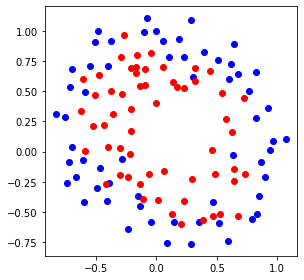

In [67]:
plt.figure()
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

2. Plot the training error with varying regularization parameters

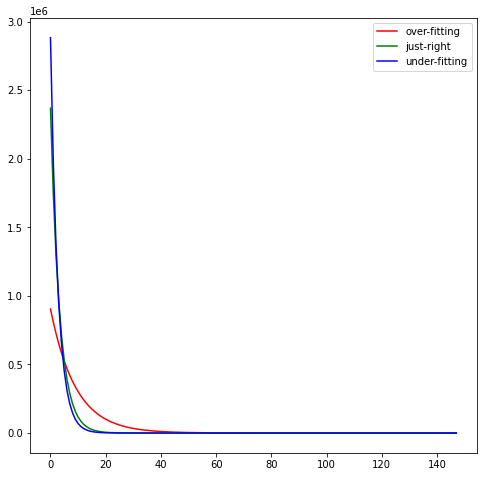

In [68]:
make_plot([(step_count_to_energy_value_over, "plot", "red", "over-fitting"), (step_count_to_energy_value, "plot", "green", "just-right"), (step_count_to_energy_value_under, "plot", "blue", "under-fitting") ])
show_plot()

3. Display the values of the chosen regularization parameters

In [69]:
print(f"over-fitting: {over_lambda_size}")
print(f"just-right: {lambda_size}")
print(f"under-fitting: {under_lambda_size}")

over-fitting: 0.5332
just-right: 1.3969
under-fitting: 1.7


4. Plot the training accuracy with varying regularization parameters

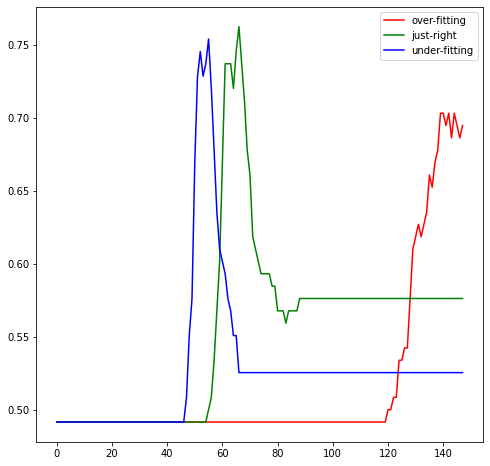

In [70]:
make_plot([(step_count_to_accuracy_over, "plot", "red", "over-fitting"), (step_count_to_accuracy, "plot", "green", "just-right"), (step_count_to_accuracy_under, "plot", "blue", "under-fitting") ])
show_plot()

5. Display the final training accuracy with varying regularization parameters

In [71]:
def get_last(d):
    return d[list(d.keys())[-1]]

print(f"over-fitting: {get_last(step_count_to_accuracy_over) * 100}%")
print(f"just-right: {get_last(step_count_to_accuracy) * 100}%")
print(f"under-fitting: {get_last(step_count_to_accuracy_under) * 100}%")

over-fitting: 69.49152542372882%
just-right: 57.6271186440678%
under-fitting: 52.54237288135594%


6. Plot the optimal classifier with varying regularization parameters superimposed on the training data

<Figure size 576x576 with 0 Axes>

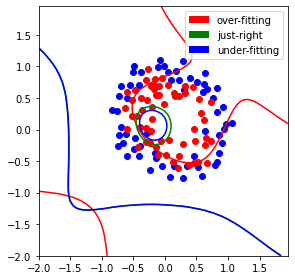

In [72]:
x = np.arange(-2, 2, 0.05)
xx, yy = np.meshgrid(x, x)

def make_tuple(poly_list, x, y):
    new_factor = []
    for (x_up, y_up) in poly_list:
        new_factor.append((x ** x_up) * (y ** y_up))

    return tuple(new_factor)

def_calc_cost_over = np.frompyfunc(lambda x, y: get_by_linear(current_theta_list_over, make_tuple(poly_list,x,y)), 2, 1)
def_calc_cost = np.frompyfunc(lambda x, y: get_by_linear(current_theta_list, make_tuple(poly_list,x,y)), 2, 1)
def_calc_cost_under = np.frompyfunc(lambda x, y: get_by_linear(current_theta_list_under, make_tuple(poly_list,x,y)), 2, 1)

result_over = def_calc_cost_over.reduce((xx, yy), axis=0).astype(np.float64)
result = def_calc_cost.reduce((xx, yy), axis=0).astype(np.float64)
result_under = def_calc_cost_under.reduce((xx, yy), axis=0).astype(np.float64)


make_plot([])

plt.figure()
plt.scatter(x_label0, y_label0, c='b')
plt.scatter(x_label1, y_label1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

a = pyplot.contour(xx, yy, result_over, colors=['red', 'red'],levels=[0])
b = pyplot.contour(xx, yy, result, colors=['green', 'green'],levels=[0])
c = pyplot.contour(xx, yy, result_under, colors=['blue', 'blue'],levels=[0])

proxy = [pyplot.Rectangle((0,0),1,1,fc = pc.colors[0]) for pc in [a, b, c]]

plt.legend(proxy, ["over-fitting", "just-right", "under-fitting"])
pyplot.show()